<a href="https://colab.research.google.com/github/Yuyu817/suicide_rate_analysis/blob/main/%E8%87%AA%E6%AE%BA%E7%8E%87%E5%9B%A0%E7%B4%A0%E4%B9%8B%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

安裝套件

In [ ]:
import io
import pandas as pd
from pandas.core.frame import DataFrame
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
!pip install dabl
import dabl
from pandas.core.window.ewm import window_aggregations
import seaborn as sns
import scipy.stats as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 11.5 MB/s eta 0:00:00


爬取留言

In [ ]:
import requests
from bs4 import BeautifulSoup

# 指定文章的 URL
url = 'https://www.ptt.cc/bbs/WomenTalk/M.1660707634.A.06B.html'

# 构造 headers，用于模拟浏览器访问
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# 使用 session 对象维持登录状态
session = requests.Session()
response = session.get('https://www.ptt.cc/ask/over18', headers=headers)
payload = {'yes': 'yes'}
response = session.post('https://www.ptt.cc/ask/over18', headers=headers, data=payload)

# 发送 GET 请求
response = session.get(url, headers=headers)

# 使用 BeautifulSoup 解析 HTML 内容
soup = BeautifulSoup(response.text, 'html.parser')

# 获取文章标题和内容
title = soup.select_one('.article-meta-value:nth-of-type(2)').text
content = soup.select_one('#main-content').text

# 获取所有留言
comments = soup.select('.push')

# 查找包含关键字的留言
for comment in comments:
    content = comment.select_one('.push-content').text.strip()
    if '自殺' in content:
        print(content)


: 如果我得了連嗎啡都無法止痛的絕症就會自殺
: 人生美好，有錢美食到處玩，為何要自殺
: 身邊有女生自殺失敗男生自殺成功
: 只要是人總會有心情不好的時候，想自殺也很正常別真
: 自殺要很有勇氣
: 在家，不到一年就自殺。
: 據說真正自殺成功的人平常都不會說
: 有喔，不過自殺是很羞恥的事情嗎？
: 不覺得自殺羞恥的事 就是個人的選擇而已
: 有很鬱悶的時候，但沒有想自殺過
: 有想過啊 等我老了生活無法自理的時候希望能自殺
: 青少年自殺率變高，可多關心探討
: 我以為每個人都有想過要自殺 結果我身邊的人都沒想過 超扯
: 學生時期有統計過 只有三分之一的人想過要自殺...
: 嘗試自殺跟自殘不太一樣吧
: 自殺未遂真的會被強制關精神科？！
: 國中時開始想自殺，直到工作後嘗試一次燒炭但失敗，現在
: 讓自己生活忙碌起來才有辦法降低想自殺的慾望


In [ ]:
import requests
from bs4 import BeautifulSoup

# 指定文章的 URL
url = 'https://www.ptt.cc/bbs/Gossiping/M.1662828342.A.DB6.html'

# 构造 headers，用于模拟浏览器访问
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# 使用 session 对象维持登录状态
session = requests.Session()
response = session.get('https://www.ptt.cc/ask/over18', headers=headers)
payload = {'yes': 'yes'}
response = session.post('https://www.ptt.cc/ask/over18', headers=headers, data=payload)

# 发送 GET 请求
response = session.get(url, headers=headers)

# 使用 BeautifulSoup 解析 HTML 内容
soup = BeautifulSoup(response.text, 'html.parser')

# 获取文章标题和内容
title = soup.select_one('.article-meta-value:nth-of-type(2)').text
content = soup.select_one('#main-content').text

# 获取所有留言
comments = soup.select('.push')

# 查找包含关键字的留言
for comment in comments:
    content = comment.select_one('.push-content').text.strip()
    if '自殺' in content:
        print(content)

: 活到100歲老死的自殺法呢?
: 燒碳自殺很痛苦哦，一點也不溫和
: 不穿褲子上班 社會性自殺
: 你有沒有想過最溫和的自殺就是每天廢廢的過
: 八卦肥宅不是三高就糖尿 早就慢性自殺
: 之前看別人po文好像是純氮自殺
: 飲食慢性自殺90年
: 有啊 每天坐電腦前看廢片慢性自殺 嗚嗚嗚
: 從出生就面對死亡不用想怎麼自殺
: 參考麻醉醫注射藥物自殺 或是氮氣窒息
: 不會google的，還是別自殺擾人了
: 什麼會想自殺 才發現原來是害怕面對困
: 氮氣自殺 可是鋼瓶難運又貴 可以買


In [ ]:
import requests
from bs4 import BeautifulSoup

# 指定文章的 URL
url = 'https://www.ptt.cc/bbs/Gossiping/M.1659892512.A.22D.html'

# 构造 headers，用于模拟浏览器访问
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# 使用 session 对象维持登录状态
session = requests.Session()
response = session.get('https://www.ptt.cc/ask/over18', headers=headers)
payload = {'yes': 'yes'}
response = session.post('https://www.ptt.cc/ask/over18', headers=headers, data=payload)

# 发送 GET 请求
response = session.get(url, headers=headers)

# 使用 BeautifulSoup 解析 HTML 内容
soup = BeautifulSoup(response.text, 'html.parser')

# 获取文章标题和内容
title = soup.select_one('.article-meta-value:nth-of-type(2)').text
content = soup.select_one('#main-content').text

# 获取所有留言
comments = soup.select('.push')

# 查找包含关键字的留言
for comment in comments:
    content = comment.select_one('.push-content').text.strip()
    if '自殺' in content:
        print(content)

: 屈原自殺還被紀念
: 思想強大的揍別人 行為懦弱的不敢自殺
: 自殺與勇敢不勇敢無關，與天生性格和人
: 自殺無關乎勇敢
: 自殺有很多情境啊，沒有一定怎樣，自
: 自殺可以分成為了別人和為了自己兩大
: 為了別人自殺通常是勇敢，為了自己自
: 為了別人自殺是蠢是死忠
: 你覺得日本那麼愛自殺 是勇敢 自私?
: 有些久病厭世自殺的 病情反覆又疼痛
: 這六年你過得好嗎？自殺是不是增加了呢
: 絕對不能自殺，傻了
: 想自殺的人
: 生失戀自殺，和香港人抗爭自殺應該不
: 勇於自殺 但弱於面對
: 自殺的人不是想殺死自己 而是想殺死他們
: 我以前覺得自殺的人好笨，事情一定都
: 有解決辦法，自殺是最笨的選擇。現在
: 敢實踐，就覺得自殺的人是勇敢。心境和
: 自殺需要很大的勇氣
: 憂鬱症自殺完全無關勇敢與否
: 自殺的人不在意 在意的人自殺了也不
: 懦弱的人才會說自殺的人懦弱
: 在收割者眼中 韭菜自殺當然是懦夫
: 自殺無關勇敢與懦弱，而是絕望
: 自殺只是選擇，沒別的
: 的是行為不正的爛人。 但不是要捧自殺
: 譴責自殺者的人 就跟那些用宗教恐嚇詛咒
: 自殺者的迷信狗半斤八兩 古代執政者為了
: 避免低端人口叛亂或自殺 造成社會動盪勞
: 做好事下輩子當皇帝 敢自殺就下地獄或重
: 譴責自殺者


In [ ]:
import requests
from bs4 import BeautifulSoup

# 指定文章的 URL
url = 'https://www.ptt.cc/bbs/Gossiping/M.1671526417.A.08E.html'

# 模擬瀏覽器訪問
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# 通過"是否已滿18歲”
session = requests.Session()
response = session.get('https://www.ptt.cc/ask/over18', headers=headers)
payload = {'yes': 'yes'}
response = session.post('https://www.ptt.cc/ask/over18', headers=headers, data=payload)

# 發送請求
response = session.get(url, headers=headers)

# 使用 BeautifulSoup 解析 HTML 内容
soup = BeautifulSoup(response.text, 'html.parser')

# 獲取文章標題和內容
title = soup.select_one('.article-meta-value:nth-of-type(2)').text
content = soup.select_one('#main-content').text

# 獲取所有留言
comments = soup.select('.push')

# 查找包含關鍵字的留言
for comment in comments:
    content = comment.select_one('.push-content').text.strip()
    if '自殺' in content:
        print(content)

: 問題就是自殺的認識了你
: 不自殺，還不是一樣會死
: 「自殺」到底算自己殺了自己還是別
: 自殺的人是不珍惜生命？想不開自殺


Part 1 自殺數據分析

In [ ]:
#匯入檔案
df1 = pd.read_csv('/content/Suicide Rate.csv')
df2 = pd.read_csv('/content/Life expectancy.csv')
#合併檔案
suicide = pd.merge(df1, df2)
print(suicide)
#去除整行為空值的行
from pandas.core import describe
suicide = suicide.dropna(how = 'all')

            Country GDP per capita  Suicide rate  \
0       Afghanistan          1,105          20.6   
1           Albania          4,932          32.4   
2           Algeria          4,534          15.6   
3           Andorra         46,622          18.9   
4            Angola          2,077          20.5   
..              ...            ...           ...   
127     Philippines          3,150          11.3   
128          Poland         18,746          20.3   
129        Portugal         24,027          13.2   
130  United Kingdom         39,720          11.1   
131   United States         65,112          14.0   

     Life Expectancy (years) - Men  Life Expectancy (years) - Women  \
0                             60.6                             68.2   
1                             74.8                             81.3   
2                             73.3                             78.9   
3                             81.7                             84.8   
4                   

In [ ]:
#觀察資料
suicide.info()
suicide.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            132 non-null    object 
 1   GDP per capita                     132 non-null    object 
 2   Suicide rate                       132 non-null    float64
 3   Life Expectancy (years) - Men      132 non-null    float64
 4   Life Expectancy (years) - Women    132 non-null    float64
 5   Happiness Score                    132 non-null    float64
 6   Fertility Rate (births per woman)  132 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.2+ KB


,Suicide rate,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,15.846970,71.946970,76.862879,5.579591,2.787121
std,5.450589,6.825686,6.324862,1.081534,1.396036
min,9.600000,52.900000,55.600000,3.351000,1.300000
25%,12.500000,66.650000,72.000000,4.731000,1.700000
50%,14.350000,73.400000,78.300000,5.642000,2.300000
75%,17.600000,76.425000,81.500000,6.441250,3.425000
max,39.700000,84.000000,89.500000,7.769000,7.600000


In [ ]:
#改變變數屬性
suicide['GDP per capita'] = suicide['GDP per capita'].str.replace(',', '').astype(float)
suicide['GDP per capita']
suicide['Country'] = pd.Categorical(suicide['Country'])
suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Country                            132 non-null    category
 1   GDP per capita                     132 non-null    float64 
 2   Suicide rate                       132 non-null    float64 
 3   Life Expectancy (years) - Men      132 non-null    float64 
 4   Life Expectancy (years) - Women    132 non-null    float64 
 5   Happiness Score                    132 non-null    float64 
 6   Fertility Rate (births per woman)  132 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 12.6 KB


In [ ]:
#把變數改成比較好改的名字
suicide = suicide.rename(columns={'GDP per capita': 'GDP', 'Suicide rate': 'Suicide_rate', 'Happiness Score':'Happiness_Score'})
suicide = suicide.rename(columns={'Life Expectancy (years) - Men': 'Life_Expectancy_Men', 'Life Expectancy (years) - Women': 'Life_Expectancy_Women', 'Fertility Rate (births per woman)':'Fertility_Rate'})

In [ ]:
suicide.info()
print(suicide)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Country                132 non-null    category
 1   GDP                    132 non-null    float64 
 2   Suicide_rate           132 non-null    float64 
 3   Life_Expectancy_Men    132 non-null    float64 
 4   Life_Expectancy_Women  132 non-null    float64 
 5   Happiness_Score        132 non-null    float64 
 6   Fertility_Rate         132 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 12.6 KB
            Country      GDP  Suicide_rate  Life_Expectancy_Men  \
0       Afghanistan   1105.0          20.6                 60.6   
1           Albania   4932.0          32.4                 74.8   
2           Algeria   4534.0          15.6                 73.3   
3           Andorra  46622.0          18.9                 81.7   
4            Angola   2077.0  

In [ ]:
#標準化資料
numeric_columns = suicide.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
suicide[numeric_columns] = scaler.fit_transform(suicide[numeric_columns])
print(suicide)

            Country       GDP  Suicide_rate  Life_Expectancy_Men  \
0       Afghanistan -0.681976      0.875343            -1.668725   
1           Albania -0.497687      3.048494             0.419577   
2           Algeria -0.516853     -0.045483             0.198981   
3           Andorra  1.509889      0.562262             1.434315   
4            Angola -0.635169      0.856927            -2.036384   
..              ...       ...           ...                  ...   
127     Philippines -0.583499     -0.837394             0.007799   
128          Poland  0.167524      0.820094             0.757823   
129        Portugal  0.421830     -0.487480             1.478434   
130  United Kingdom  1.177524     -0.874227             1.037244   
131   United States  2.400272     -0.340148             0.610759   

     Life_Expectancy_Women  Happiness_Score  Fertility_Rate  
0                -1.374873        -1.657269        1.375441  
1                 0.704209        -0.575992       -0.781687

In [ ]:
#迴歸
# 執行相關性檢驗
corr, p_value = stats.pearsonr(suicide['Happiness_Score'], suicide['Suicide_rate'])

# 輸出結果
print("Pearson相關係數:", corr)
print("p-value:", p_value)

Pearson相關係數: 0.011332465235816288
p-value: 0.8973846411370507


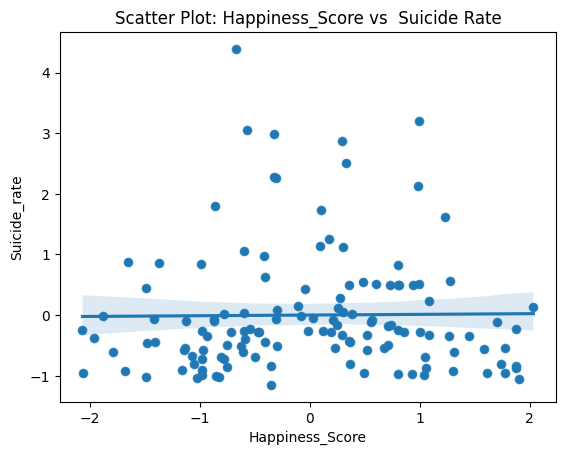

In [ ]:
# 繪製散點圖
sns.scatterplot(data=suicide, x='Happiness_Score', y='Suicide_rate')
plt.xlabel('Happiness_Score')
plt.ylabel('Suicide Rate')
plt.title('Scatter Plot: Happiness_Score vs  Suicide Rate')

# 進行線性回歸分析
sns.regplot(data=suicide, x='Happiness_Score', y='Suicide_rate')

# 顯示圖表
plt.show()

In [ ]:
#k-means
from sklearn import preprocessing
dfsuicide =  suicide.drop('Country', axis=1)
minmax_processed = preprocessing.MinMaxScaler().fit_transform(dfsuicide)
dfsuicide = pd.DataFrame(minmax_processed, index=dfsuicide.index, columns=dfsuicide.columns)

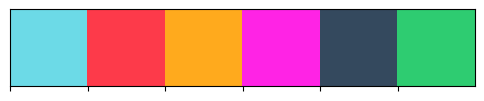

In [ ]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

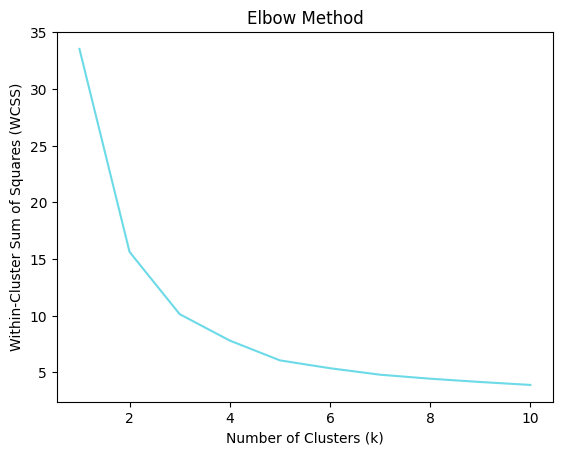

In [ ]:
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    # Create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the KMeans model to the data
    kmeans.fit(dfsuicide)
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [ ]:
print(dfsuicide[0:5])

        GDP  Suicide_rate  Life_Expectancy_Men  Life_Expectancy_Women  \
0  0.005449      0.365449             0.247588               0.371681   
1  0.037929      0.757475             0.704180               0.758112   
2  0.034552      0.199336             0.655949               0.687316   
3  0.391762      0.308970             0.926045               0.861357   
4  0.013698      0.362126             0.167203               0.294985   

   Happiness_Score  Fertility_Rate  
0         0.100272        0.539683  
1         0.363966        0.063492  
2         0.510186        0.253968  
3         0.815754        0.015873  
4         0.170665        0.634921  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


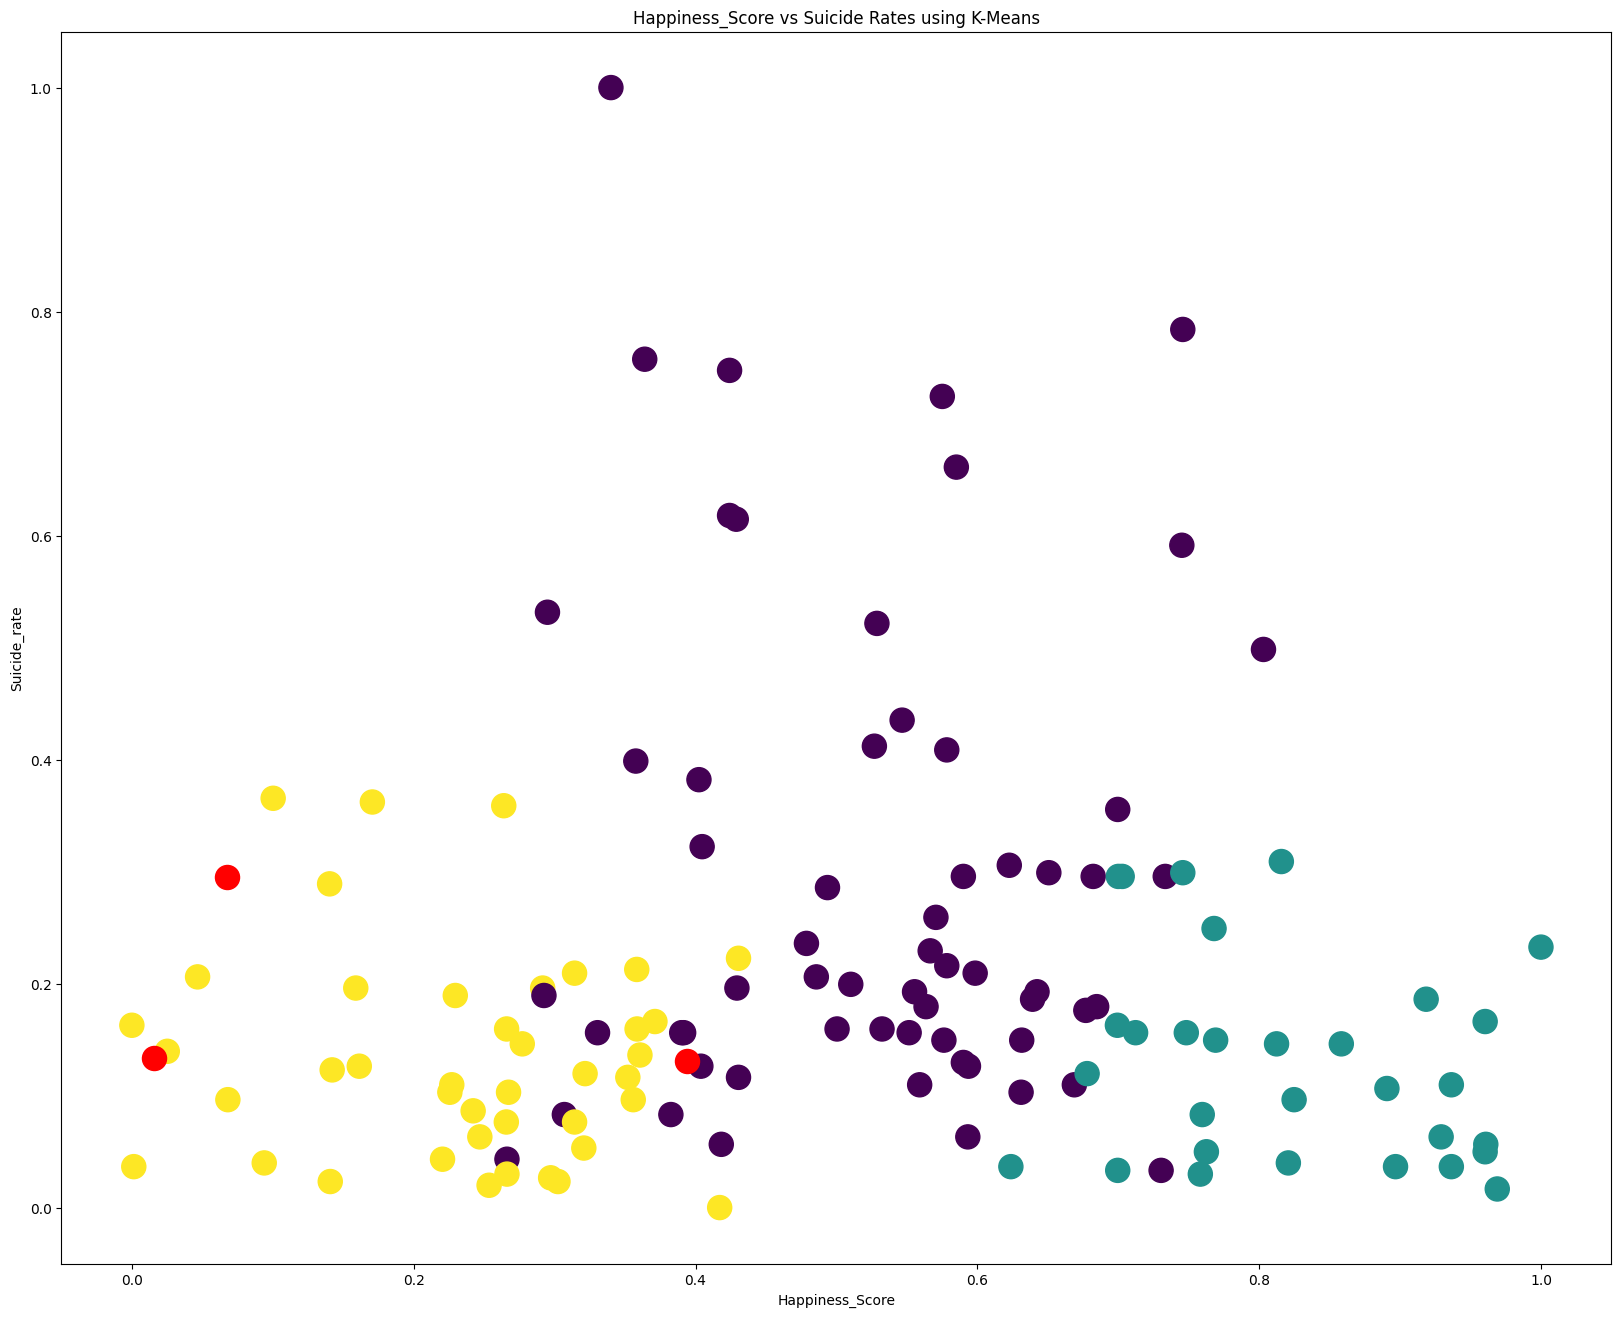

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dfsuicide)

plt.figure(figsize=(20, 16))
plt.scatter(dfsuicide['Happiness_Score'], dfsuicide['Suicide_rate'], c=kmeans.labels_, cmap='viridis', s=300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red' )
plt.xlabel('Happiness_Score')
plt.ylabel('Suicide_rate')
plt.title('Happiness_Score vs Suicide Rates using K-Means')
plt.show()

Part 2 快樂數據分析

In [ ]:
#匯入資料
happiness = pd.read_csv('/content/2017.csv')
#觀察資料
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
#把變數改成比較好改的名字
happiness = happiness.rename(columns={'Happiness.Rank': 'Happiness_Rank ', 'Happiness.Score': 'Happiness_Score', 'Whisker.high':'Whisker_high'})
happiness = happiness.rename(columns={'Whisker.low': 'Whisker_low  ', 'Economy..GDP.per.Capita.': 'GDP', 'Health..Life.Expectancy.':'Health_Life_Expectancy'})
happiness = happiness.rename(columns={'Trust..Government.Corruption.': 'Trust_Government_Corruption', 'Dystopia.Residual': 'Dystopia_Residual '})

In [ ]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      155 non-null    object 
 1   Happiness_Rank               155 non-null    int64  
 2   Happiness_Score              155 non-null    float64
 3   Whisker_high                 155 non-null    float64
 4   Whisker_low                  155 non-null    float64
 5   GDP                          155 non-null    float64
 6   Family                       155 non-null    float64
 7   Health_Life_Expectancy       155 non-null    float64
 8   Freedom                      155 non-null    float64
 9   Generosity                   155 non-null    float64
 10  Trust_Government_Corruption  155 non-null    float64
 11  Dystopia_Residual            155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [ ]:
#標準化資料
numeric_columns = happiness.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
happiness[numeric_columns] = scaler.fit_transform(happiness[numeric_columns])
print(happiness)

                      Country  Happiness_Rank   Happiness_Score  Whisker_high  \
0                      Norway        -1.720912         1.935996      1.921308   
1                     Denmark        -1.698563         1.922693      1.909902   
2                     Iceland        -1.676213         1.906730      1.946050   
3                 Switzerland        -1.653864         1.897861      1.892003   
4                     Finland        -1.631514         1.875689      1.861301   
..                        ...              ...              ...           ...   
150                    Rwanda         1.631514        -1.669973     -1.712484   
151                     Syria         1.653864        -1.677954     -1.604281   
152                  Tanzania         1.676213        -1.778169     -1.785673   
153                   Burundi         1.698563        -2.171935     -2.132547   
154  Central African Republic         1.720912        -2.359949     -2.320726   

     Whisker_low         GD

Pearson相關係數: 0.8124687538866417
p-value: 1.1103905896574e-37


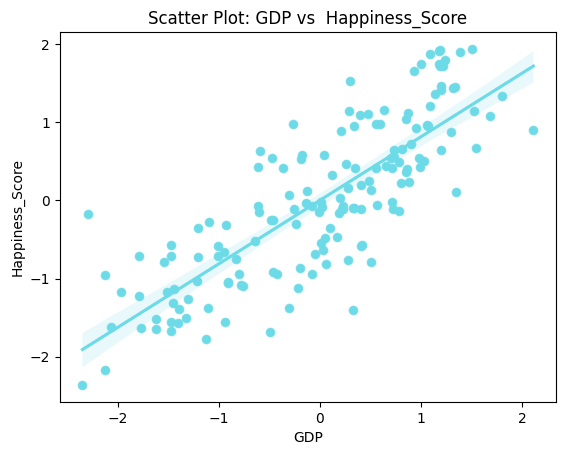

In [ ]:
#迴歸:GDP
# 執行相關性檢驗
corr, p_value = stats.pearsonr(happiness['GDP'], happiness['Happiness_Score'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)
# 繪製散點圖
sns.scatterplot(data=happiness, x='GDP', y='Happiness_Score')
plt.xlabel('GDP')
plt.ylabel('Happiness_Score')
plt.title('Scatter Plot: GDP vs  Happiness_Score')

# 進行線性回歸分析
sns.regplot(data=happiness, x='GDP', y='Happiness_Score')

# 顯示圖表
plt.show()

Pearson相關係數: 0.7527366726961486
p-value: 1.4163391139612085e-29


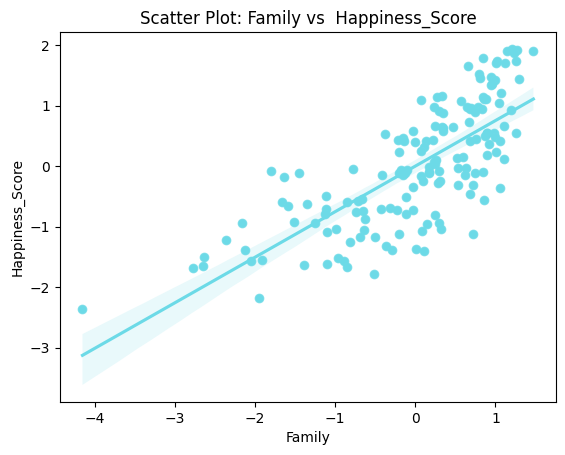

In [ ]:
#迴歸:Family
# 執行相關性檢驗
corr, p_value = stats.pearsonr(happiness['Family'], happiness['Happiness_Score'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)
# 繪製散點圖
sns.scatterplot(data=happiness, x='Family', y='Happiness_Score')
plt.xlabel('Family')
plt.ylabel('Happiness_Score')
plt.title('Scatter Plot: Family vs  Happiness_Score')

# 進行線性回歸分析
sns.regplot(data=happiness, x='Family', y='Happiness_Score')

# 顯示圖表
plt.show()

Pearson相關係數: 0.7819506247990082
p-value: 3.212970468969612e-33


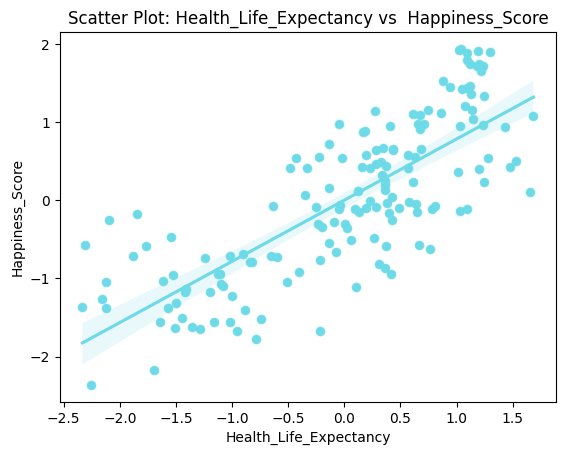

In [ ]:
#迴歸:Health_Life_Expectancy
# 執行相關性檢驗
corr, p_value = stats.pearsonr(happiness['Health_Life_Expectancy'], happiness['Happiness_Score'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)
# 繪製散點圖
sns.scatterplot(data=happiness, x='Health_Life_Expectancy', y='Happiness_Score')
plt.xlabel('Health_Life_Expectancy')
plt.ylabel('Happiness_Score')
plt.title('Scatter Plot: Health_Life_Expectancy vs  Happiness_Score')

# 進行線性回歸分析
sns.regplot(data=happiness, x='Health_Life_Expectancy', y='Happiness_Score')

# 顯示圖表
plt.show()

Pearson相關係數: 0.5701371935975078
p-value: 9.687898897858754e-15


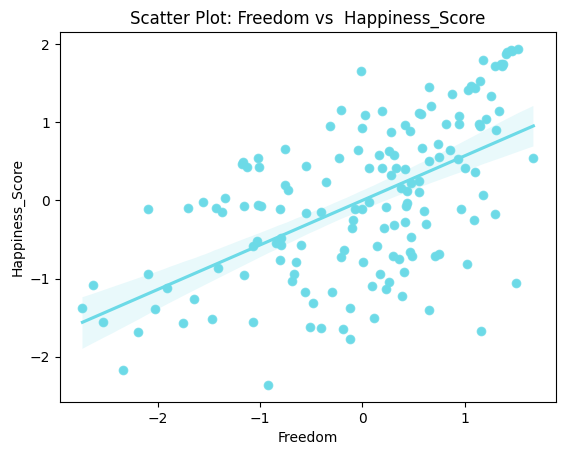

In [ ]:
#迴歸:Freedom
# 執行相關性檢驗
corr, p_value = stats.pearsonr(happiness['Freedom'], happiness['Happiness_Score'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)
# 繪製散點圖
sns.scatterplot(data=happiness, x='Freedom', y='Happiness_Score')
plt.xlabel('Freedom')
plt.ylabel('Happiness_Score')
plt.title('Scatter Plot: Freedom vs  Happiness_Score')

# 進行線性回歸分析
sns.regplot(data=happiness, x='Freedom', y='Happiness_Score')

# 顯示圖表
plt.show()

Pearson相關係數: 0.1552558391127447
p-value: 0.053732504079262


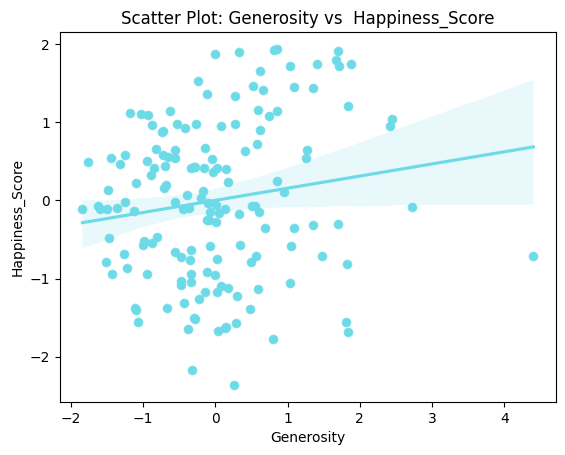

In [ ]:
#迴歸:Generosity
# 執行相關性檢驗
corr, p_value = stats.pearsonr(happiness['Generosity'], happiness['Happiness_Score'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)
# 繪製散點圖
sns.scatterplot(data=happiness, x='Generosity', y='Happiness_Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness_Score')
plt.title('Scatter Plot: Generosity vs  Happiness_Score')

# 進行線性回歸分析
sns.regplot(data=happiness, x='Generosity', y='Happiness_Score')

# 顯示圖表
plt.show()

Pearson相關係數: 0.42907973722217213
p-value: 2.538310699741522e-08


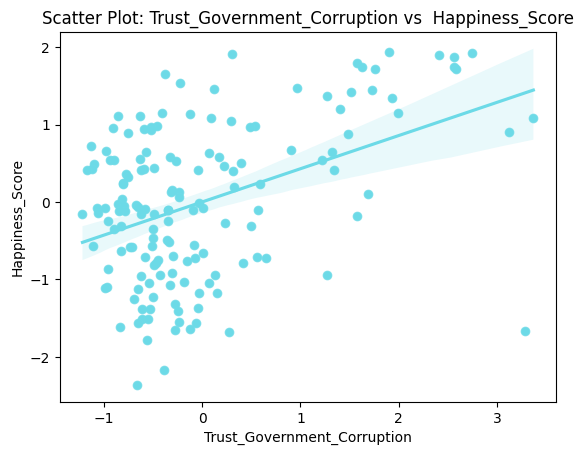

In [ ]:
#迴歸:Trust_Government_Corruption
# 執行相關性檢驗
corr, p_value = stats.pearsonr(happiness['Trust_Government_Corruption'], happiness['Happiness_Score'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)
# 繪製散點圖
sns.scatterplot(data=happiness, x='Trust_Government_Corruption', y='Happiness_Score')
plt.xlabel('Trust_Government_Corruption')
plt.ylabel('Happiness_Score')
plt.title('Scatter Plot: Trust_Government_Corruption vs  Happiness_Score')

# 進行線性回歸分析
sns.regplot(data=happiness, x='Trust_Government_Corruption', y='Happiness_Score')

# 顯示圖表
plt.show()

3. Suicide rate and WDI data

In [ ]:
#匯入檔案
wdi = pd.read_csv('/content/suicidedataextrafestures.csv')
#去除整行為空值的行
wdi = wdi.dropna(how = 'all')
wdi = wdi.loc[~(wdi == 0).all(axis=1)]
DataFrame(wdi)

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15107,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#觀察資料
wdi.info()
wdi.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

,year,suicides_no,population,suicidesper100k,yearlyHDI,GDPpyear,GDPpcapital,suicide%,Individuals using the Internet (% of population),Expense (% of GDP),...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
count,15110.000000,15110.000000,1.511000e+04,15110.000000,4740.000000,1.511000e+04,15110.000000,15110.000000,15002.000000,13634.000000,...,15110.000000,12782.000000,5618.000000,1.511000e+04,15110.000000,15110.000000,14978.000000,15110.000000,14642.000000,9542.000000
mean,2000.987690,398.831105,3.035752e+06,13.403846,0.805473,7.837162e+11,20722.516744,0.013404,23.297437,19.616559,...,5.666988,1.807460,0.480598,1.252609e+07,50.020781,43.999561,12558.250768,2.794107,64.228897,42.367336
std,8.591292,1185.471686,4.908197e+06,17.656537,0.089959,1.903936e+12,19307.084627,0.017657,29.502869,17.154008,...,5.754279,1.733828,1.734895,2.460246e+07,36.100563,49.662299,51750.701129,6.374382,47.253081,46.156786
min,1985.000000,0.000000,4.400000e+03,0.000000,0.539000,1.201313e+09,357.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,16.000000,4.247912e+05,2.010000,0.740000,5.700843e+10,4431.000000,0.002009,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2001.000000,80.000000,1.052860e+06,7.330000,0.823000,2.099510e+11,14729.000000,0.007333,6.079458,20.244213,...,5.100000,1.909000,0.000000,2.937065e+06,72.716000,16.012921,34.000000,0.518000,99.722549,0.000000
75%,2008.000000,275.000000,3.621750e+06,18.097500,0.884000,5.621755e+11,31630.000000,0.018095,43.984351,35.162572,...,8.855000,3.239000,0.000000,1.568707e+07,78.387805,91.749337,937.000000,2.095000,100.000000,92.810770
max,2016.000000,22338.000000,4.380521e+07,177.610000,0.944000,1.812070e+13,109804.000000,0.177609,96.546800,62.186783,...,33.473000,7.334100,12.000000,1.588311e+08,83.331951,172.121808,551744.000000,41.821999,100.000000,116.367400


In [ ]:
wdi = wdi.dropna()
wdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            1416 non-null   object 
 1   year                                                                               1416 non-null   int64  
 2   sex                                                                                1416 non-null   object 
 3   age                                                                                1416 non-null   object 
 4   suicides_no                                                                        1416 non-null   int64  
 5   population                                                                         1416 non-null   int6

In [ ]:
#把變數改成比較好改的名字
wdi = wdi.rename(columns={'suicide%':'suicide' })
wdi = wdi.rename(columns={'Individuals using the Internet (% of population)':'using_the_Internet_population' })
wdi = wdi.rename(columns={'Expense (% of GDP)':'Expense_of_GDP' })
wdi = wdi.rename(columns={'Compensation of employees (% of expense)':'Compensation_of_employees' })
wdi = wdi.rename(columns={'Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment' })
wdi = wdi.rename(columns={'Physicians (per 1,000 people)':'Physicians_per_1000people' })
wdi = wdi.rename(columns={'Strength of legal rights index (0=weak to 12=strong)':'Strength_of_legal' })
wdi = wdi.rename(columns={'Labor force, total':'Labor_force_total' })
wdi = wdi.rename(columns={'Life expectancy at birth, total (years)':'Life_expectancy' })
wdi = wdi.rename(columns={'Mobile cellular subscriptions (per 100 people)':'Mobile_perpeople' })
wdi = wdi.rename(columns={'Refugee population by country or territory of origin':'Refugee_population' })
wdi = wdi.rename(columns={'Contributing family workers, total (% of total employment) (modeled ILO estimate)':'Contributing_family_workers' })
wdi = wdi.rename(columns={'Access to electricity (% of population)':'Access_electricity' })
wdi = wdi.rename(columns={'Lower secondary completion rate, total (% of relevant age group)':'Lower_secondary_completion' })

Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:692: UserWarning: Dropped 2 outliers in column suicide.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:652: UserWarning: Discarding 2 outliers in target column.
  warn(f"Discarding {n_outliers} outliers in target column.",
/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:692: UserWarning: Dropped 1 outliers in column suicide.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9908964014857192) feature Compensation_of_employees. Set prune_correlations_threshold=0 to keep.
  warn(f"Not plotting highly correlated ({corr.max()})"
/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:107: UserWarning: Not plotting highly correlated (0.9930826987667078) feature Unemployment. Set prune_correlations_threshold=0 to keep.
  warn(f"Not pl

[<Axes: title={'center': 'Target distribution'}, xlabel='suicide', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.00E+00'}, xlabel='suicidesper100k', ylabel='suicide'>,
         <Axes: title={'center': 'F=6.92E-01'}, xlabel='suicides_no'>,
         <Axes: title={'center': 'F=1.91E-01'}, xlabel='yearlyHDI'>,
         <Axes: title={'center': 'F=1.75E-01'}, xlabel='GDPpcapital'>],
        [<Axes: title={'center': 'F=9.38E-02'}, xlabel='GDPpyear', ylabel='suicide'>,
         <Axes: title={'center': 'F=-1.72E-02'}, xlabel='Contributing_family_workers'>,
         <Axes: title={'center': 'F=-1.03E-02'}, xlabel='population'>,
         <Axes: >]], dtype=object),
 array([[<Axes: title={'center': 'F=3.94E-01'}, xlabel='suicide', ylabel='year'>,
         <Axes: title={'center': 'F=2.88E-01'}, xlabel='suicide', ylabel='sex'>,
         <Axes: title={'center': 'F=1.75E-01'}, xlabel='suicide', ylabel='age'>],
        [<Axes: title={'center': 'F=1.60E-02'}, xlabel='suicide', ylabel='generat

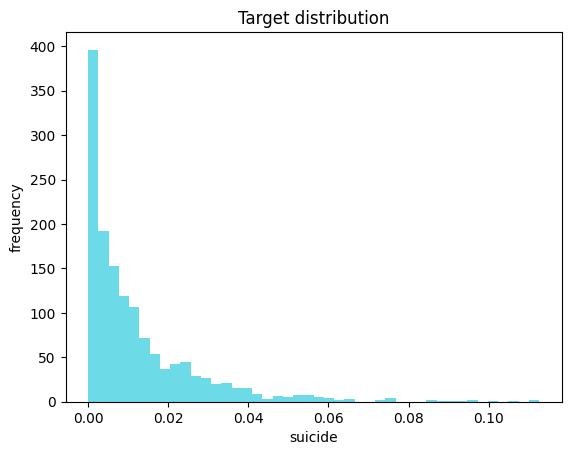

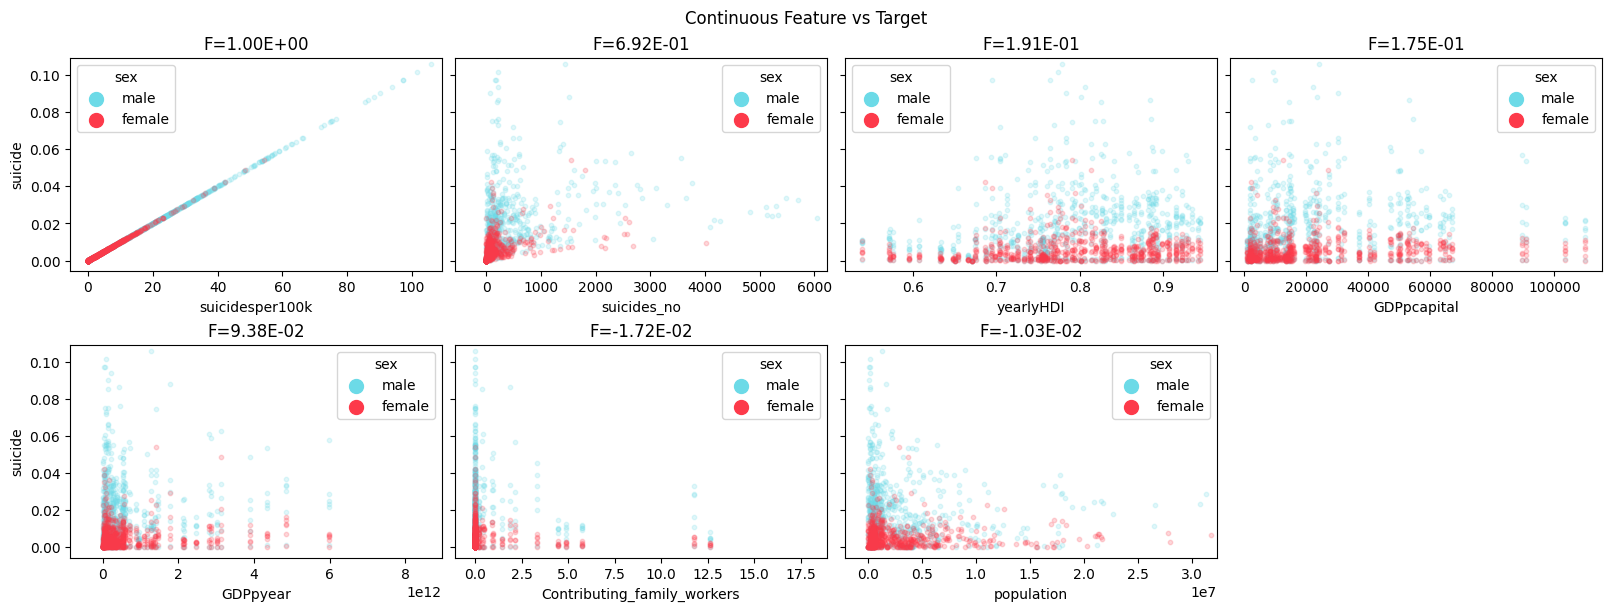

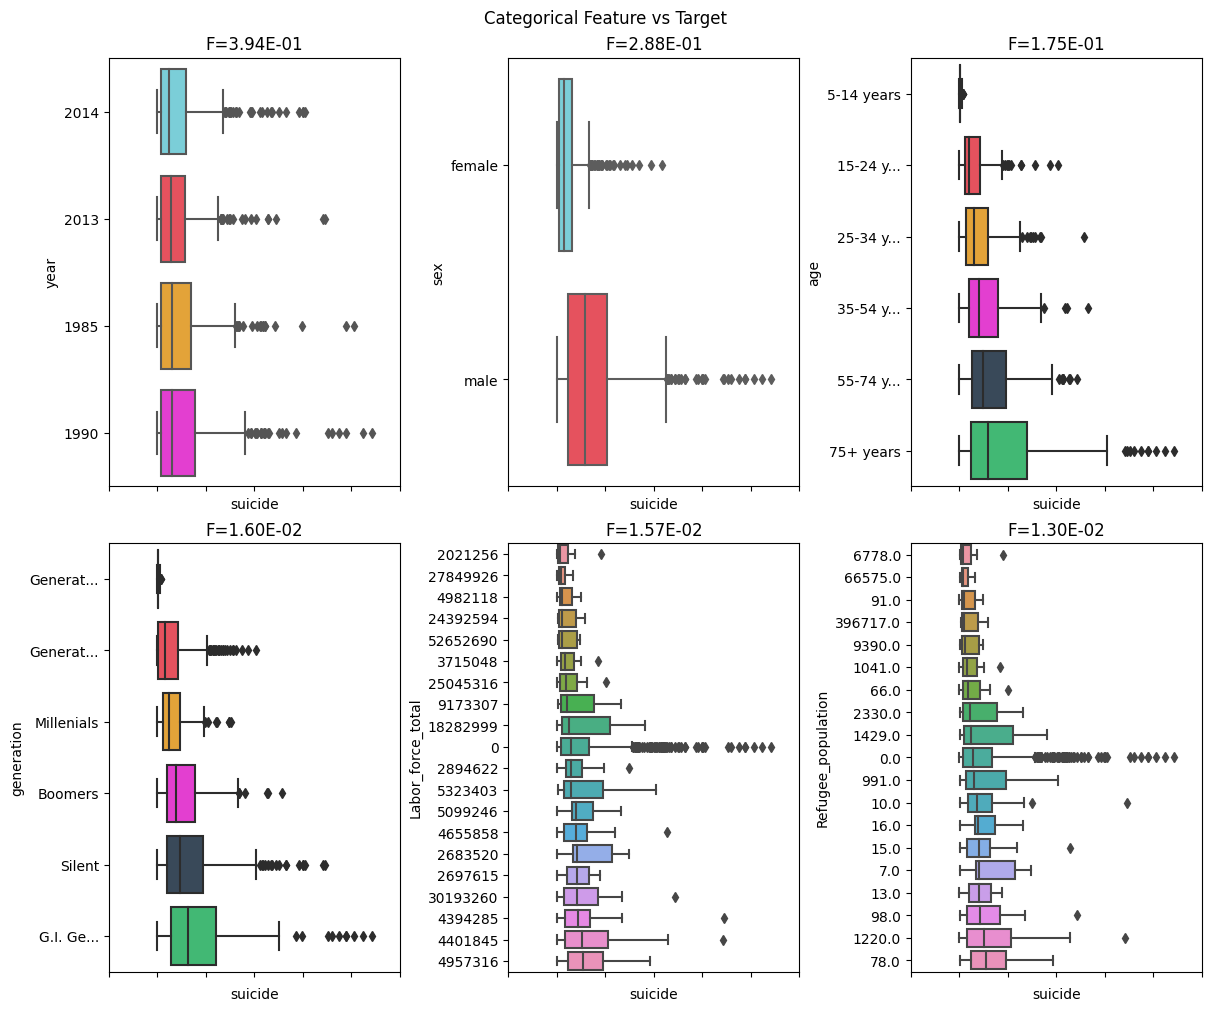

In [ ]:
#EDA
dabl.plot(wdi, target_col="suicide")

In [ ]:
wdi

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physicians_per_1000people,Strength_of_legal,Labor_force_total,Life_expectancy,Mobile_perpeople,Refugee_population,Contributing_family_workers,Access_electricity,Lower_secondary_completion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15107,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
numeric_cols = wdi.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
wdi_standardized = pd.DataFrame(scaler.fit_transform(wdi[numeric_cols]), columns=numeric_cols)
wdi_standardized.head()

,year,suicides_no,population,suicidesper100k,yearlyHDI,GDPpyear,GDPpcapital,suicide,using_the_Internet_population,Expense_of_GDP,...,Unemployment,Physicians_per_1000people,Strength_of_legal,Labor_force_total,Life_expectancy,Mobile_perpeople,Refugee_population,Contributing_family_workers,Access_electricity,Lower_secondary_completion
0,-1.233315,-0.150503,-0.563108,2.734375,-1.02932,-0.366557,-0.846937,2.734212,-0.422356,-0.420267,...,-0.372579,-0.414745,-0.405903,-0.2837,-0.437664,-0.431915,-0.112068,-0.236102,-0.438079,-0.436789
1,-1.233315,0.203205,-0.208879,0.752340,-1.02932,-0.366557,-0.846937,0.752122,-0.422356,-0.420267,...,-0.372579,-0.414745,-0.405903,-0.2837,-0.437664,-0.431915,-0.112068,-0.236102,-0.438079,-0.436789
2,-1.233315,0.114465,0.083630,-0.001035,-1.02932,-0.366557,-0.846937,-0.000908,-0.422356,-0.420267,...,-0.372579,-0.414745,-0.405903,-0.2837,-0.437664,-0.431915,-0.112068,-0.236102,-0.438079,-0.436789
3,-1.233315,-0.140504,-0.142326,-0.207076,-1.02932,-0.366557,-0.846937,-0.206777,-0.422356,-0.420267,...,-0.372579,-0.414745,-0.405903,-0.2837,-0.437664,-0.431915,-0.112068,-0.236102,-0.438079,-0.436789
4,-1.233315,-0.181749,-0.157457,-0.282287,-1.02932,-0.366557,-0.846937,-0.282132,-0.422356,-0.420267,...,-0.372579,-0.414745,-0.405903,-0.2837,-0.437664,-0.431915,-0.112068,-0.236102,-0.438079,-0.436789


In [ ]:
model1 = ols('suicide ~ country + sex + age  + generation ',wdi).fit()
Results1 = sm.stats.anova_lm(model1)
print(Results1)

                df    sum_sq   mean_sq           F         PR(>F)
country       43.0  0.056193  0.001307   12.193787   3.148361e-69
sex            1.0  0.066143  0.066143  617.170172  1.175443e-112
age            5.0  0.080521  0.016104  150.266199  3.508073e-127
generation     5.0  0.005766  0.001153   10.759986   3.659041e-10
Residual    1361.0  0.145860  0.000107         NaN            NaN


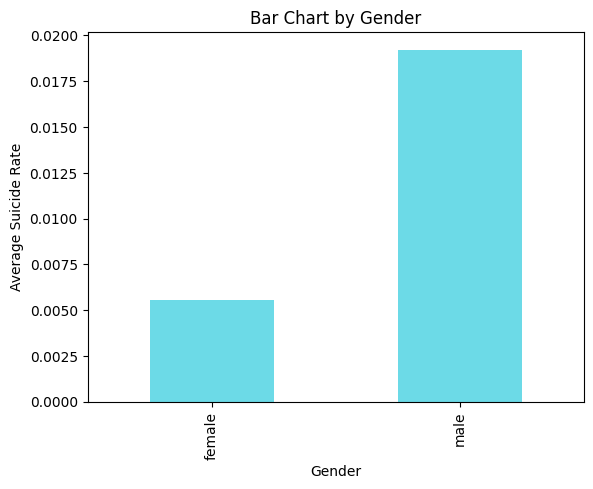

In [ ]:
grouped = wdi.groupby('sex')['suicide'].mean()
grouped.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Suicide Rate')
plt.title('Bar Chart by Gender')
plt.show()

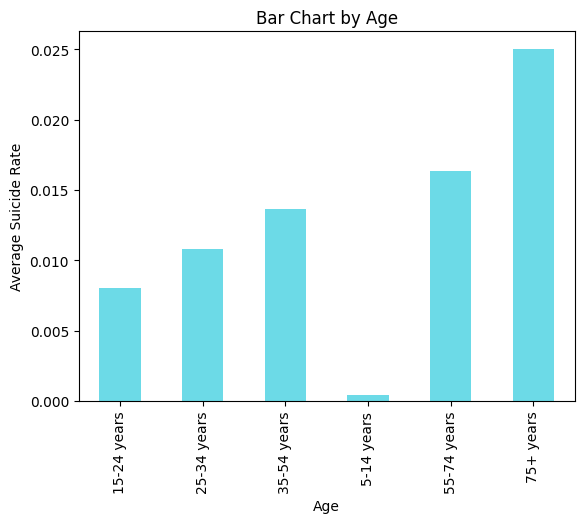

In [ ]:
grouped = wdi.groupby('age')['suicide'].mean()
grouped.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Suicide Rate')
plt.title('Bar Chart by Age')
plt.show()

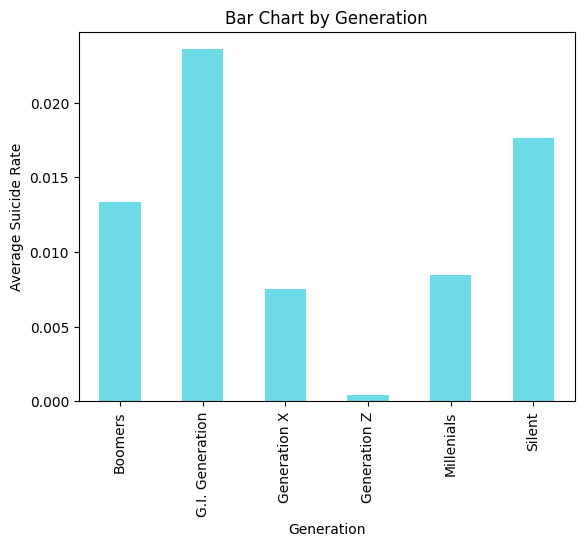

In [ ]:
grouped = wdi.groupby('generation')['suicide'].mean()
grouped.plot(kind='bar')
plt.xlabel('Generation')
plt.ylabel('Average Suicide Rate')
plt.title('Bar Chart by Generation')
plt.show()

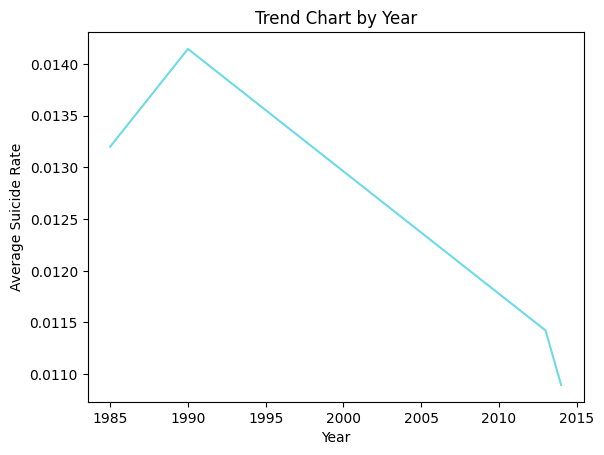

In [ ]:
grouped = wdi.groupby('year')['suicide'].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate')
plt.title('Trend Chart by Year')
plt.show()

In [ ]:
a = wdi[wdi['age'] == '15-24 years']
a

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physicians_per_1000people,Strength_of_legal,Labor_force_total,Life_expectancy,Mobile_perpeople,Refugee_population,Contributing_family_workers,Access_electricity,Lower_secondary_completion
6,Argentina,1985,male,15-24 years,156,2415200,6.46,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,Argentina,1985,female,15-24 years,69,2354200,2.93,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
66,Argentina,1990,male,15-24 years,174,2635000,6.60,Argentina1990,0.705,1.413520e+11,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
68,Argentina,1990,female,15-24 years,91,2568000,3.54,Argentina1990,0.705,1.413520e+11,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
349,Argentina,2014,male,15-24 years,738,3492454,21.13,Argentina2014,0.836,5.263200e+11,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14543,United States,1990,female,15-24 years,709,18097900,3.92,United States1990,0.859,5.979590e+12,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
14826,United States,2014,male,15-24 years,4089,22700273,18.01,United States2014,0.915,1.742760e+13,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
14830,United States,2014,female,15-24 years,990,21691057,4.56,United States2014,0.915,1.742760e+13,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15100,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


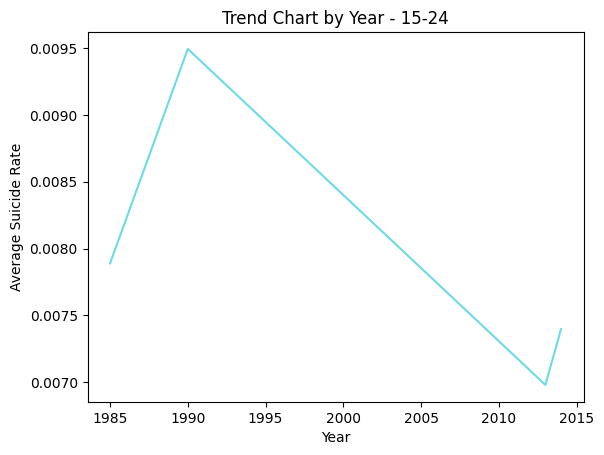

In [ ]:
grouped = a.groupby('year')['suicide'].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate')
plt.title('Trend Chart by Year - 15-24')
plt.show()

In [ ]:
b = wdi[wdi['sex'] == 'male']
b

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physicians_per_1000people,Strength_of_legal,Labor_force_total,Life_expectancy,Mobile_perpeople,Refugee_population,Contributing_family_workers,Access_electricity,Lower_secondary_completion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,Argentina,1985,male,15-24 years,156,2415200,6.46,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15099,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15101,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15102,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15103,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


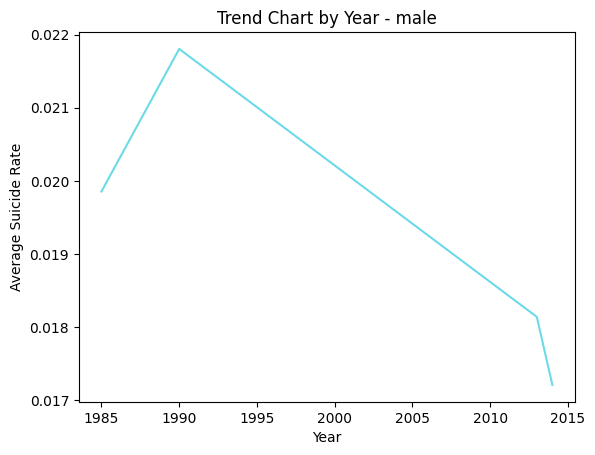

In [ ]:
grouped = b.groupby('year')['suicide'].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate')
plt.title('Trend Chart by Year - male')
plt.show()

In [ ]:
c = wdi[wdi['sex'] == 'female']
c

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physicians_per_1000people,Strength_of_legal,Labor_force_total,Life_expectancy,Mobile_perpeople,Refugee_population,Contributing_family_workers,Access_electricity,Lower_secondary_completion
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,Argentina,1985,female,75+ years,41,537000,7.64,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,Argentina,1985,female,35-54 years,142,3355300,4.23,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,Argentina,1985,female,25-34 years,65,2185200,2.97,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,Argentina,1985,female,15-24 years,69,2354200,2.93,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15104,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15105,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15106,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
15108,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


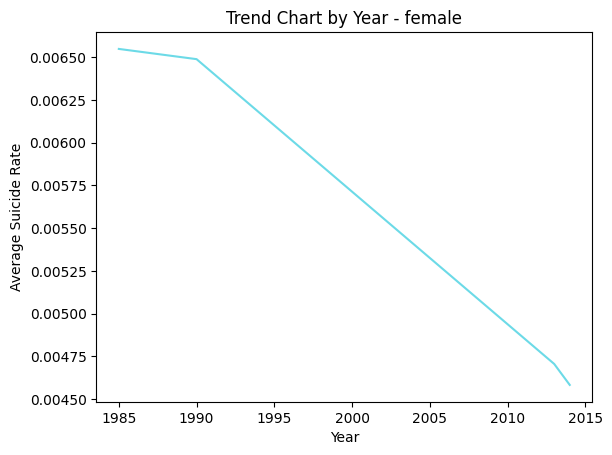

In [ ]:
grouped = c.groupby('year')['suicide'].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate')
plt.title('Trend Chart by Year - female')
plt.show()

<ipython-input-47-78a63b81d6ac>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = wdi.groupby(['age', 'year']).mean().reset_index()


<Axes: xlabel='year', ylabel='suicide'>

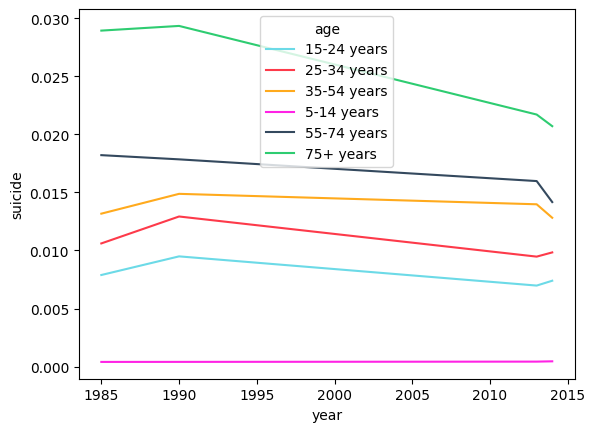

In [ ]:
import seaborn as sns
avg = wdi.groupby(['age', 'year']).mean().reset_index()
sns.lineplot(x='year', y='suicide', hue='age', data=avg)

In [ ]:
# 計算每個國家的年平均 HDI 和平均自殺率
mean_hdi = wdi.groupby('country')['yearlyHDI'].mean()
mean_suicide_rate = wdi.groupby('country')['suicide'].mean()

data = pd.concat([mean_hdi, mean_suicide_rate], axis=1)
data.reset_index(inplace=True)
data.columns = ['country', 'mean_hdi', 'mean_suicide_rate']

# 執行相關性檢驗
corr, p_value = stats.pearsonr(data['mean_hdi'], data['mean_suicide_rate'])
print("Pearson相關係數:", corr)
print("p-value:", p_value)

# 繪製散點圖
sns.scatterplot(data=data, x='mean_hdi', y='mean_suicide_rate')
plt.xlabel('Average HDI')
plt.ylabel('Average Suicide Rate')
plt.title('Scatter Plot: Average HDI vs Average Suicide Rate')

# 進行線性回歸分析
sns.regplot(data=data, x='mean_hdi', y='mean_suicide_rate')

# 顯示圖表
plt.show()


NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

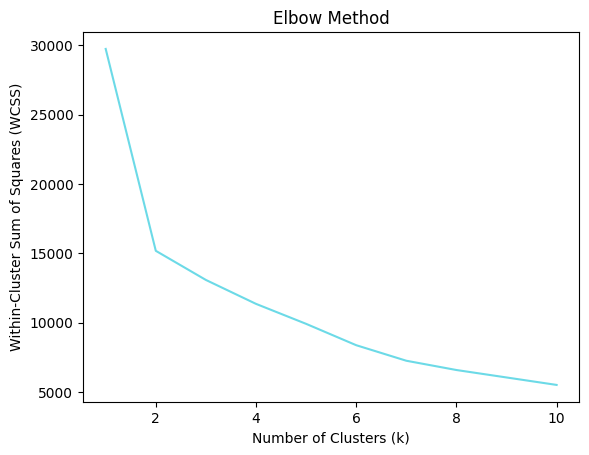

In [ ]:
#k means
wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    # Create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the KMeans model to the data
    kmeans.fit(wdi_standardized)
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


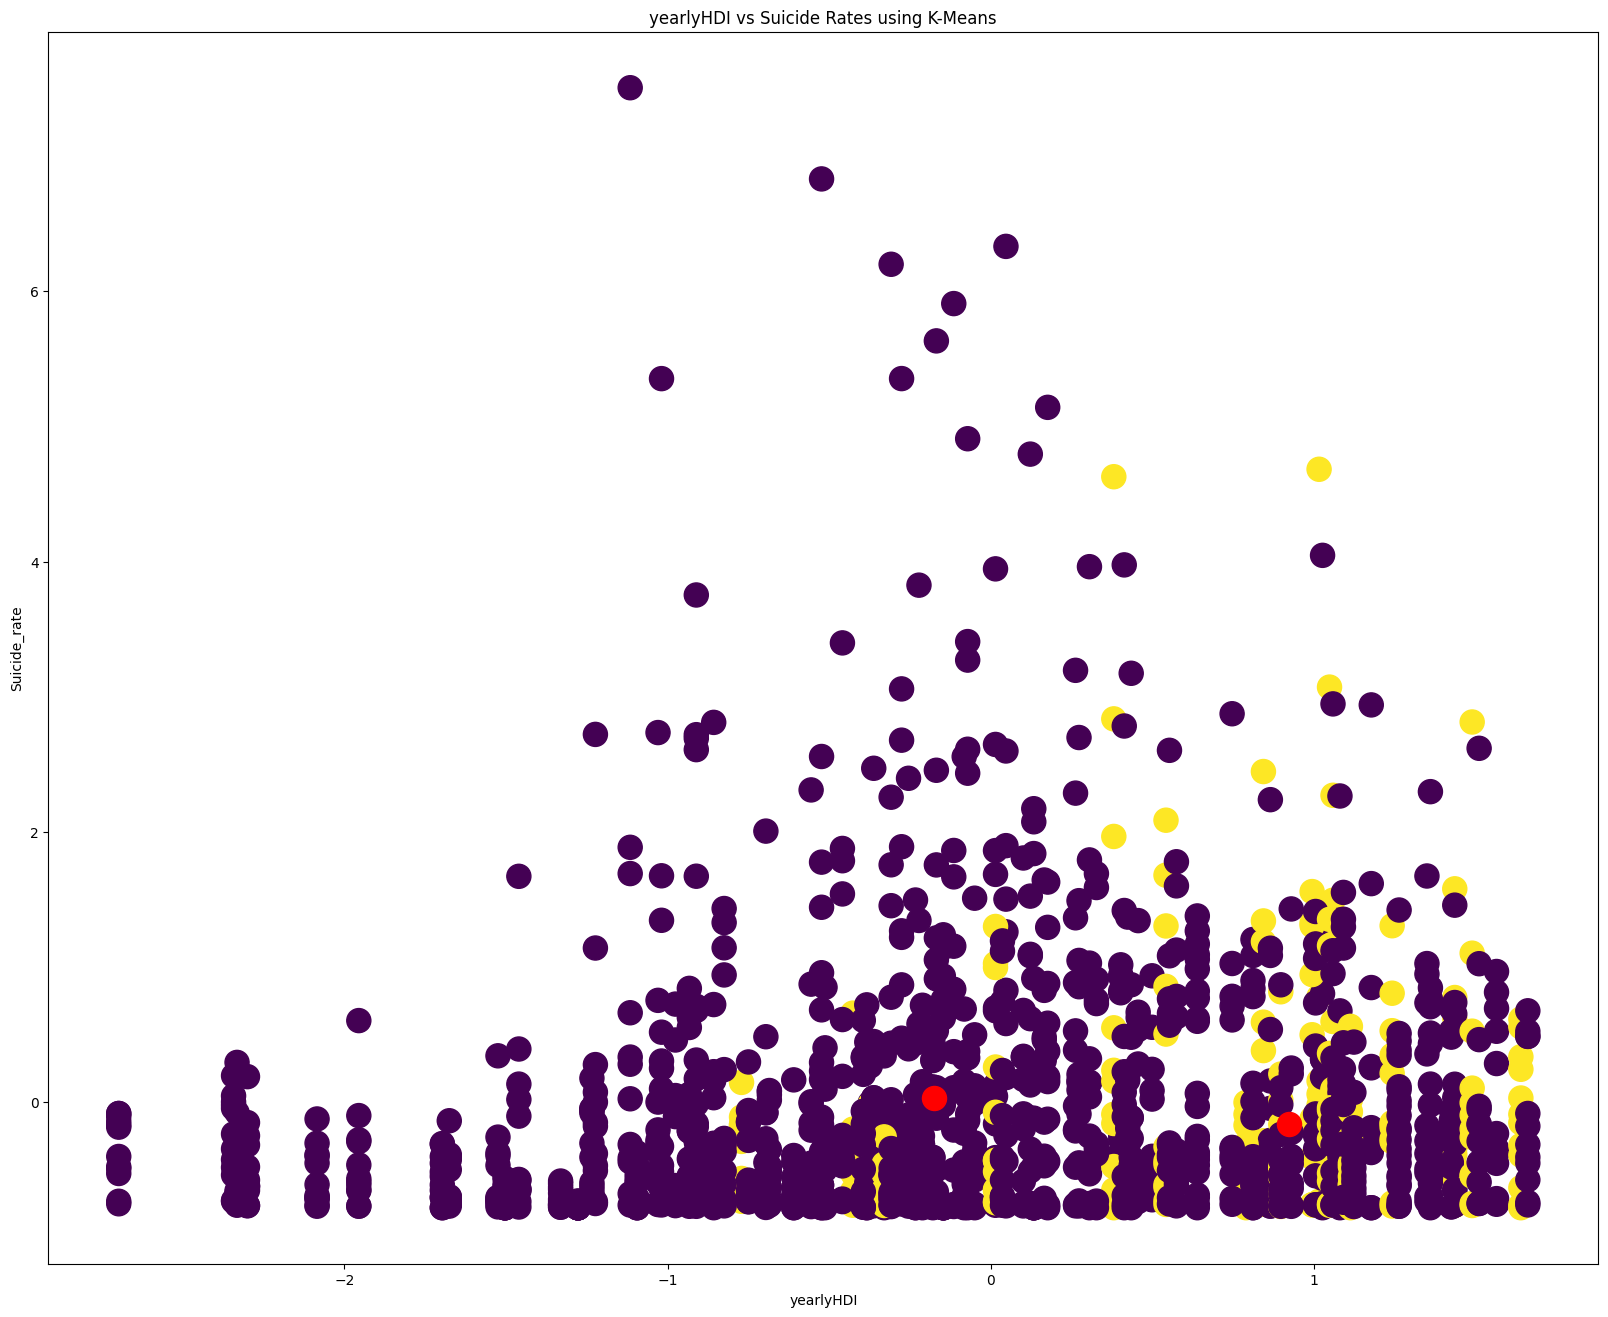

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(wdi_standardized)

plt.figure(figsize=(20, 16))
plt.scatter(wdi_standardized['yearlyHDI'], wdi_standardized['suicide'], c=kmeans.labels_, cmap='viridis', s=300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red' )
plt.xlabel('yearlyHDI')
plt.ylabel('Suicide_rate')
plt.title('yearlyHDI vs Suicide Rates using K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


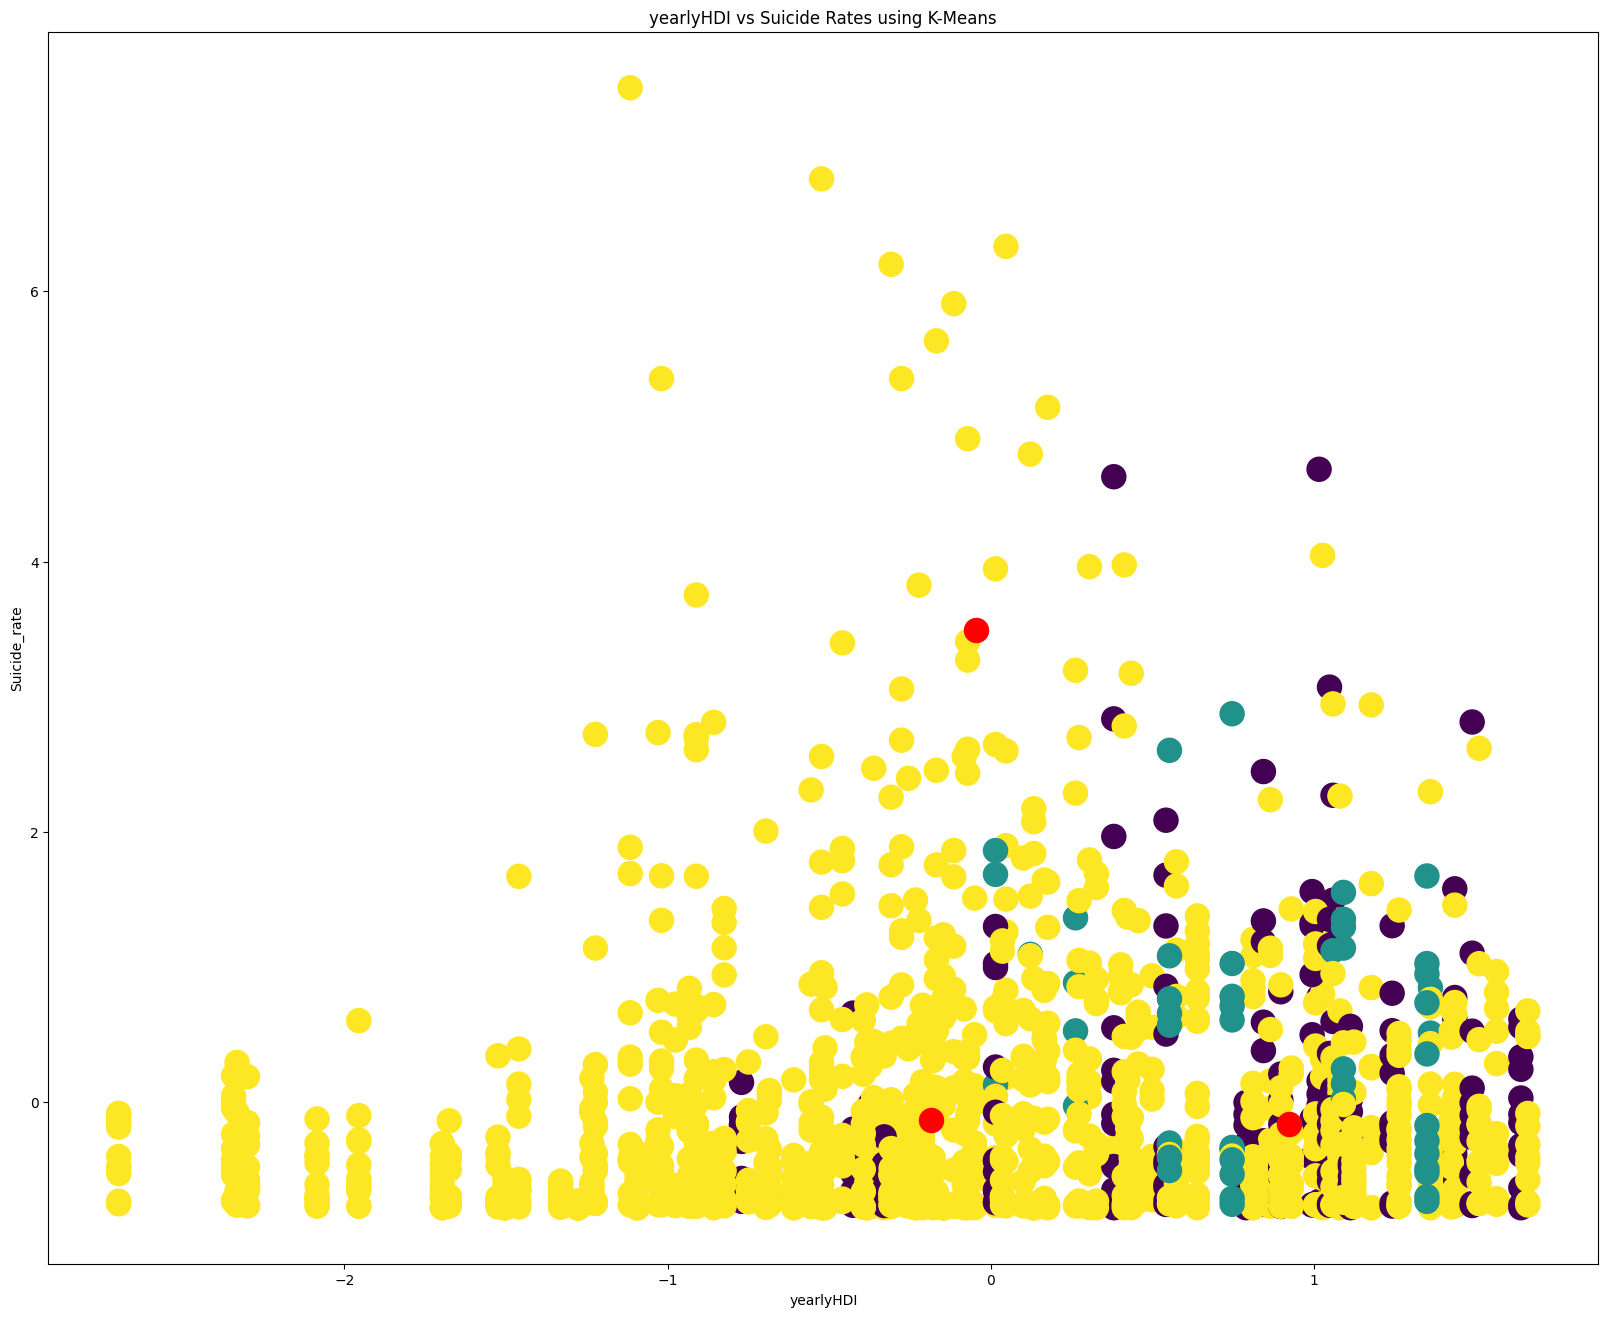

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(wdi_standardized)

plt.figure(figsize=(20, 16))
plt.scatter(wdi_standardized['yearlyHDI'], wdi_standardized['suicide'], c=kmeans.labels_, cmap='viridis', s=300)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red' )
plt.xlabel('yearlyHDI')
plt.ylabel('Suicide_rate')
plt.title('yearlyHDI vs Suicide Rates using K-Means')
plt.show()

4.social media usage

In [ ]:
usage = pd.read_csv('//content/Final.csv')
#去除整行為空值的行
usage = usage.dropna(how = 'all')
usage = usage.loc[~(usage == 0).all(axis=1)]
DataFrame(usage)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000
1,1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000
2,2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000
3,3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000
4,4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


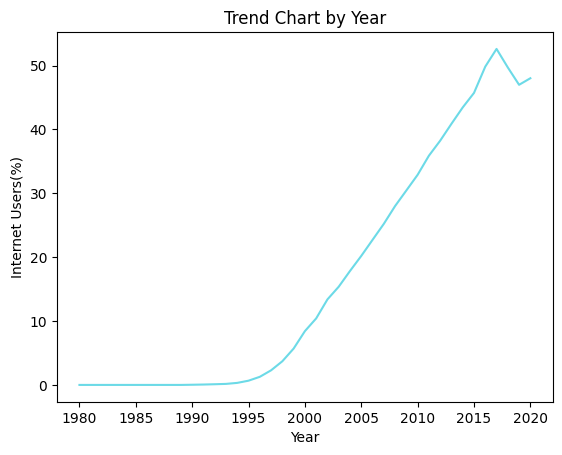

In [ ]:
grouped = usage.groupby('Year')['Internet Users(%)'].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Internet Users(%)')
plt.title('Trend Chart by Year')
plt.show()

In [ ]:
regression_results = pd.DataFrame(columns=['variable','Correlation', 'P-value'])

# 迴圈遍歷每個變數
for variable in wdi.columns:
    # 排除非數值型變數
    if wdi[variable].dtype != 'object':
        # 計算每個國家的年平均 HDI 和平均自殺率
        mean_variable = wdi.groupby('country')[variable].mean()
        mean_target = wdi.groupby('country')['suicide'].mean()  # 將目標變數替換為你想預測的變數名稱

        data = pd.concat([mean_variable, mean_target], axis=1)
        data.reset_index(inplace=True)
        data.columns = ['country', 'mean_variable', 'mean_target']
        corr, p_value = stats.pearsonr(data['mean_variable'], data['mean_target'])
        # 執行相關性檢驗
        regression_results = regression_results.append({
            'variable': variable,
            'Correlation': corr,
            'P-value': p_value
        }, ignore_index=True)

# 輸出迴歸結果
print(regression_results)

                         variable  Correlation        P-value
0                            year    -0.029293   8.502876e-01
1                     suicides_no     0.293240   5.337928e-02
2                      population    -0.027580   8.589502e-01
3                 suicidesper100k     1.000000  1.040768e-171
4                       yearlyHDI     0.551980   1.026636e-04
5                        GDPpyear     0.153760   3.190023e-01
6                     GDPpcapital     0.324887   3.141560e-02
7                         suicide     1.000000   0.000000e+00
8   using_the_Internet_population     0.214219   1.626145e-01
9                  Expense_of_GDP     0.172882   2.617639e-01
10      Compensation_of_employees    -0.050234   7.460714e-01
11                   Unemployment    -0.048889   7.526489e-01
12      Physicians_per_1000people     0.111391   4.716108e-01
13              Strength_of_legal     0.088225   5.690272e-01
14              Labor_force_total    -0.172437   2.630132e-01
15      

<ipython-input-68-1d8f350fe21d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({
<ipython-input-68-1d8f350fe21d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({
<ipython-input-68-1d8f350fe21d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({
<ipython-input-68-1d8f350fe21d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({
<ipython-input-68-1d8f350fe21d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas

5.